# Skeleton scaling


This notebook investigates a skeleton strategy. 

In short, the intuition is to normalize each subject so their joints have the same length.

In [1]:
%matplotlib notebook
import numpy as np
import h5py
import random
import os
import sys

import matplotlib.pyplot as plt
# Moves back one folder to use module from src folder
sys.path.insert(0, os.getcwd() + '/../')

from play_skeleton import *
from src.models.data_augmentation import *
from src.utils.joints import *

ntu_path = "/media/gnocchi/Seagate Backup Plus Drive/NTU-RGB-D/"

rgb_folder = "nturgb+d_rgb/"
skeleton_folder = "nturgb+d_skeletons/"

h5_dataset_path = "/media/gnocchi/Seagate Backup Plus Drive/NTU-RGB-D/"
dataset_file_name = "datasets.h5"
log_file_name = "log.txt"

## Random sample

In [2]:
# Sample names in a list (total of 56880 samples)
samples_names_list = [line.rstrip('\n') for line in open(h5_dataset_path + log_file_name)]

# Shuffle samples_names_list 
random.shuffle(samples_names_list)

# Take first random sample
sample_name = samples_names_list[0]

# Open dataset
dataset = h5py.File(h5_dataset_path + dataset_file_name, 'r')

# Get sample : shape (3, max_frame, n_joints = 25, n_subjects = 2)
skeleton = dataset[sample_name]["skeleton"][:]

In [3]:
# animateJointCoordinates(skeleton.transpose(3, 2, 0, 1)[0], connexion_tuples)

## Compute adjacent joint distances

In [4]:
def adjacent_joints_distance(skeleton):
    # skeleton shape (3, max_frame, n_joints = 25, n_subjects = 2)
    max_frame = skeleton.shape[1]
    n_neighbors = connexion_tuples.shape[0]
    
    distances_matrix = np.zeros((n_neighbors, max_frame, 2))
    
    for j in range(n_neighbors):
        distances_matrix[j, :, :] = ((skeleton[0, :, connexion_tuples[j, 0], :] - skeleton[0, :, connexion_tuples[j, 1], :]) ** 2 + \
                                    (skeleton[1, :, connexion_tuples[j, 0], :] - skeleton[1, :, connexion_tuples[j, 1], :]) ** 2 + \
                                    (skeleton[2, :, connexion_tuples[j, 0], :] - skeleton[2, :, connexion_tuples[j, 1], :]) ** 2 ) ** (1/2)

        
    return distances_matrix


In [5]:
distances_matrix = adjacent_joints_distance(skeleton)


## Distribution of each joints

Previous exploration shows there is not much variation sequence wise in joint distances. It makes more sense to rescale the joints sequence wise rather than frame wise. The following code investigates neighboring joint distances distributions.

In [6]:
avg_distances = []

for sample_name in samples_names_list[:1000]:
    skeleton = dataset[sample_name]["skeleton"][:]
    
    distances_matrix = adjacent_joints_distance(skeleton)
    distances_matrix = np.mean(distances_matrix, axis=1)
    
    avg_distances_sub_0 = distances_matrix[:, 0]
    avg_distances_sub_1 = distances_matrix[:, 1]
    
    # Append skeleton if subject exists
    if np.any(avg_distances_sub_0):
        avg_distances.append(avg_distances_sub_0)
        
    if np.any(avg_distances_sub_1):
        avg_distances.append(avg_distances_sub_1)
    
    

<IPython.core.display.Javascript object>


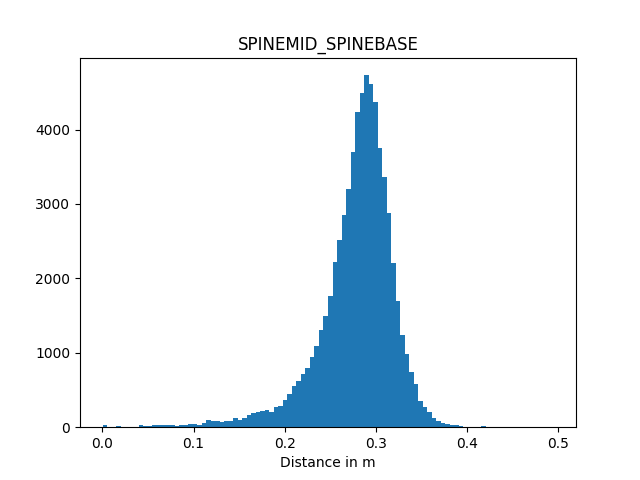

<IPython.core.display.Javascript object>


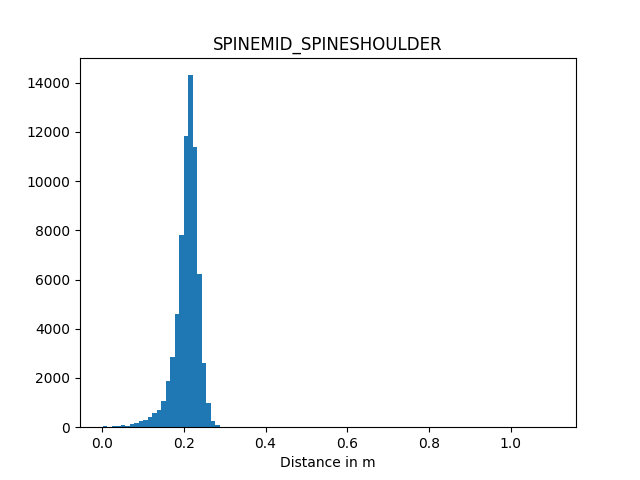

<IPython.core.display.Javascript object>


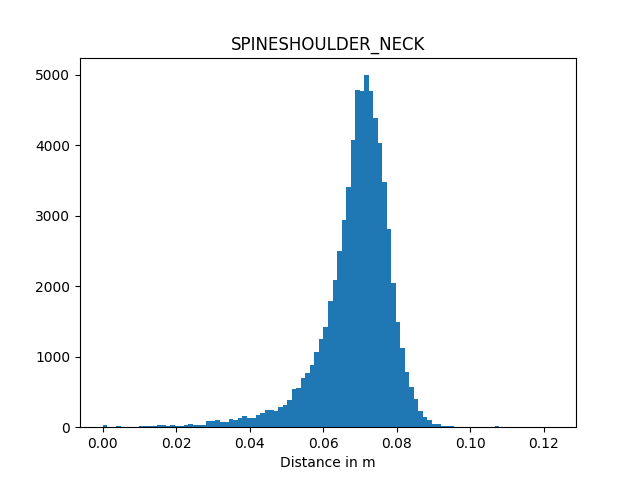

<IPython.core.display.Javascript object>


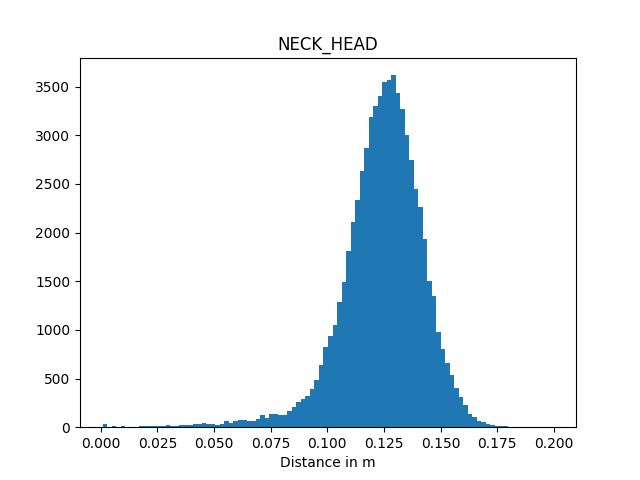

<IPython.core.display.Javascript object>


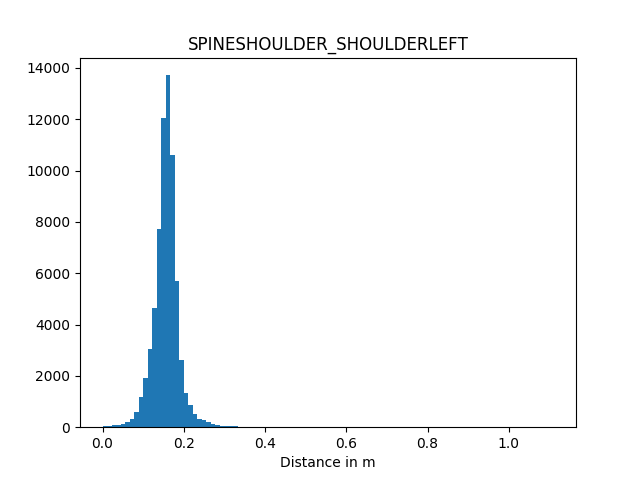

<IPython.core.display.Javascript object>


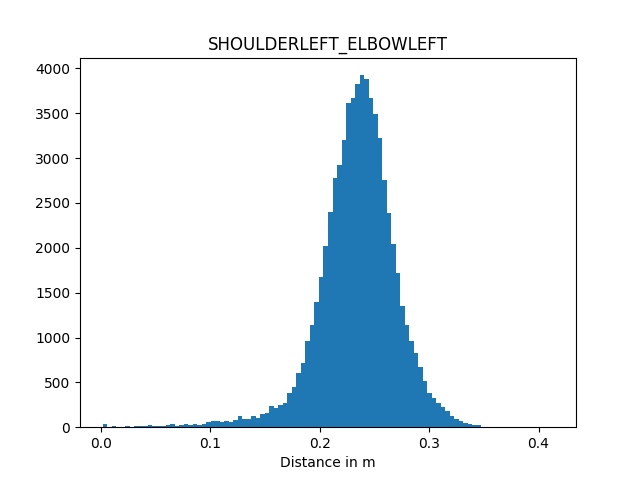

<IPython.core.display.Javascript object>


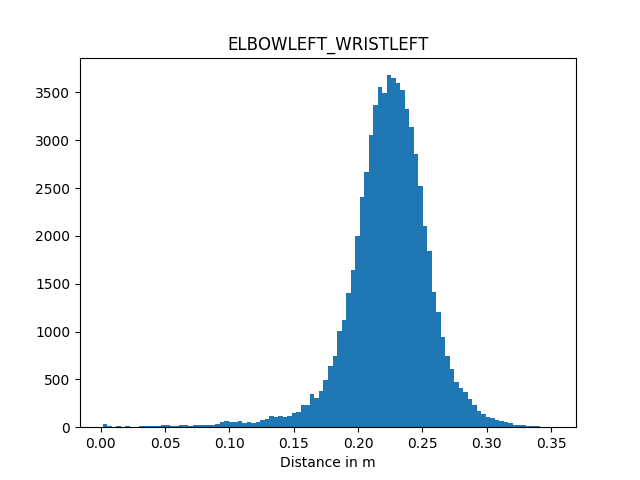

<IPython.core.display.Javascript object>


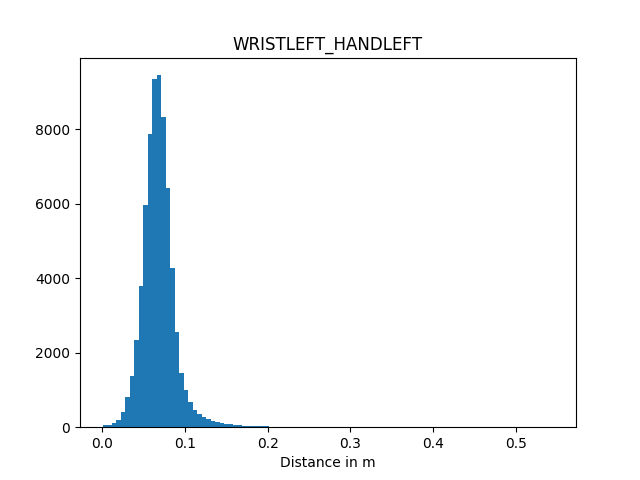

<IPython.core.display.Javascript object>


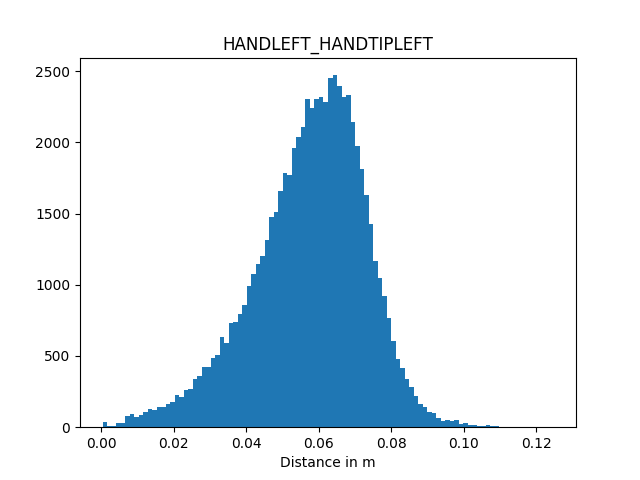

<IPython.core.display.Javascript object>


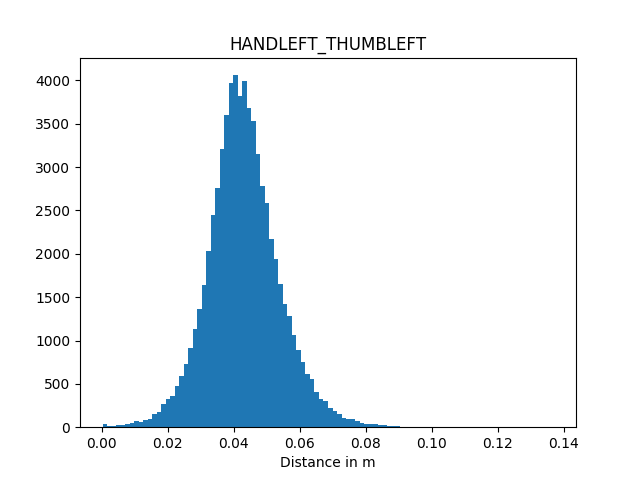

<IPython.core.display.Javascript object>


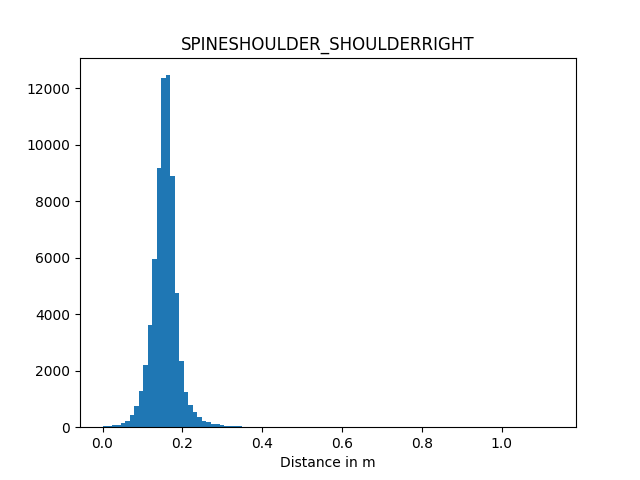

<IPython.core.display.Javascript object>


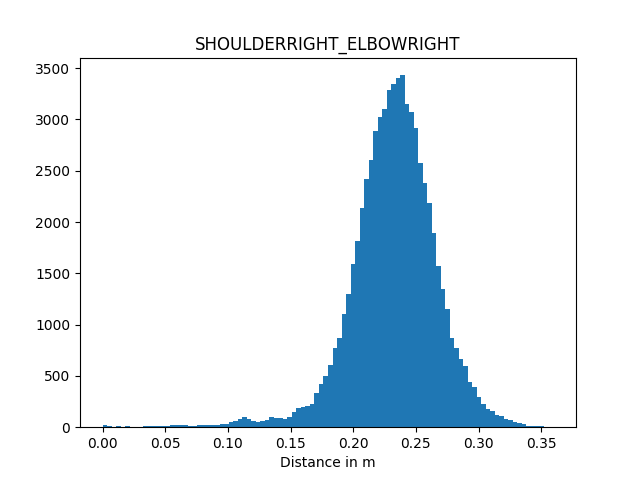

<IPython.core.display.Javascript object>


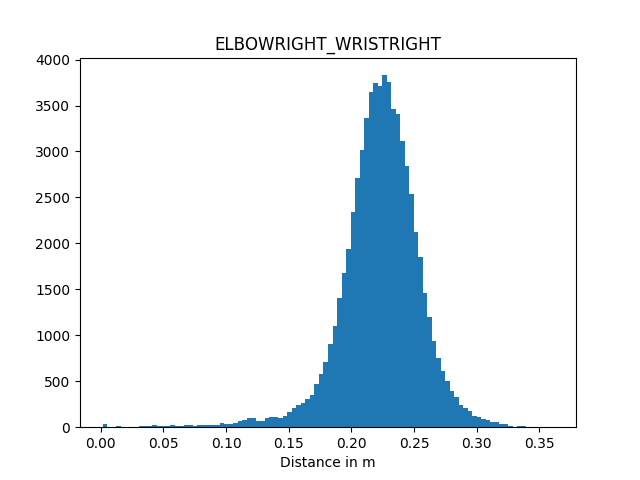

<IPython.core.display.Javascript object>


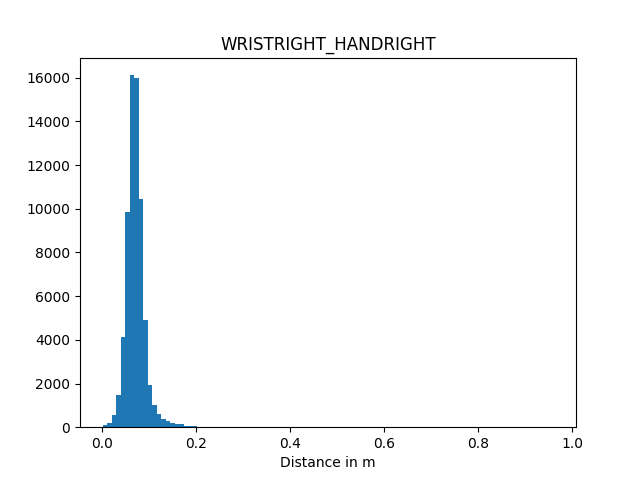

<IPython.core.display.Javascript object>


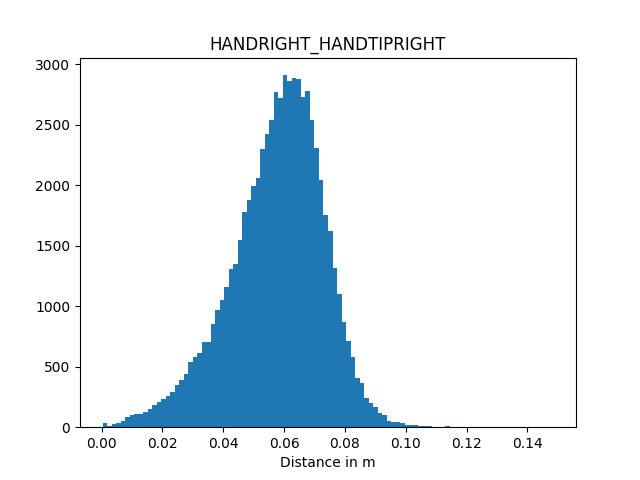

<IPython.core.display.Javascript object>


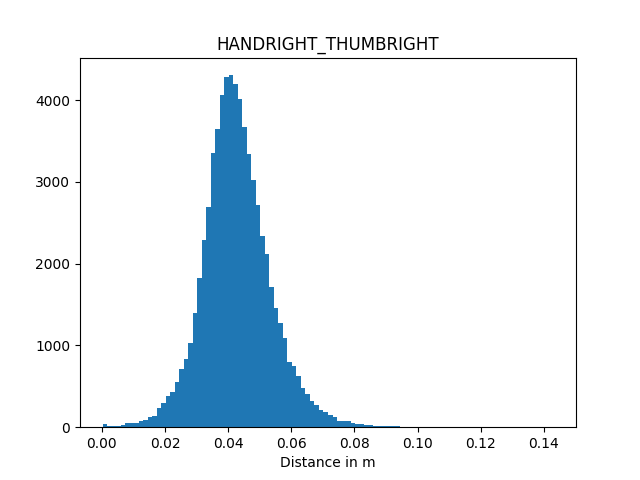

<IPython.core.display.Javascript object>


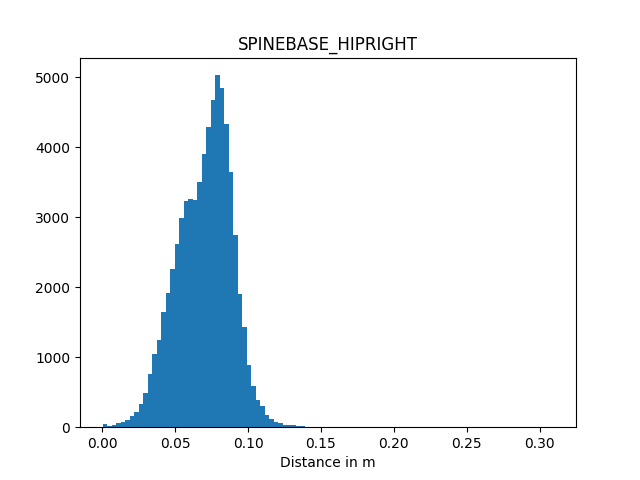

<IPython.core.display.Javascript object>


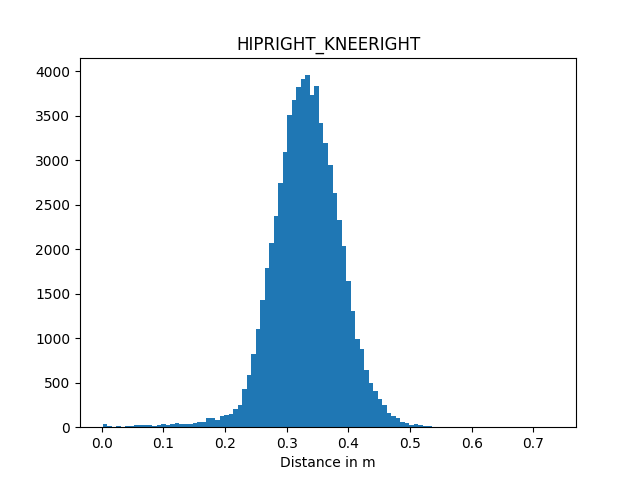

<IPython.core.display.Javascript object>


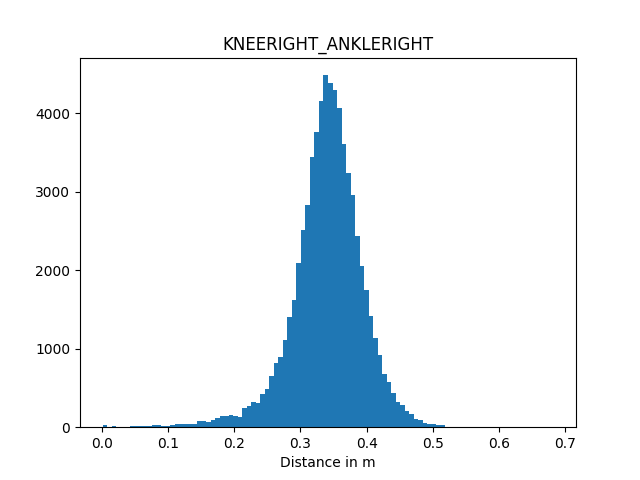

<IPython.core.display.Javascript object>


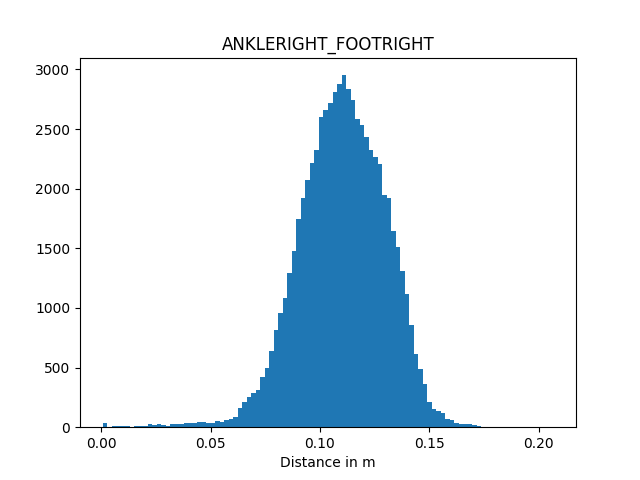

/home/gnocchi/.virtualenvs/ntu-rgb-d/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


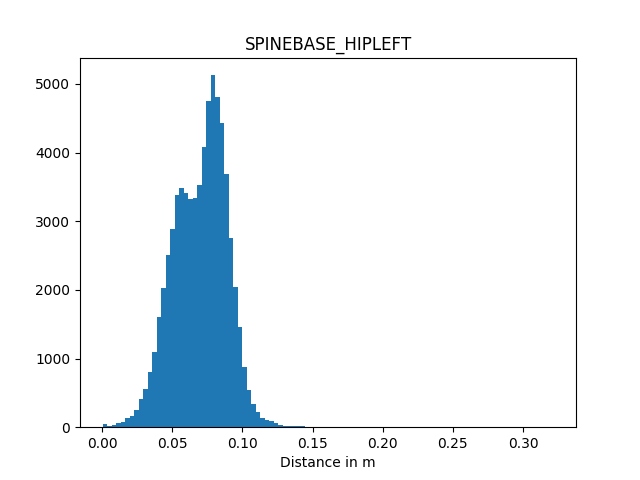

<IPython.core.display.Javascript object>


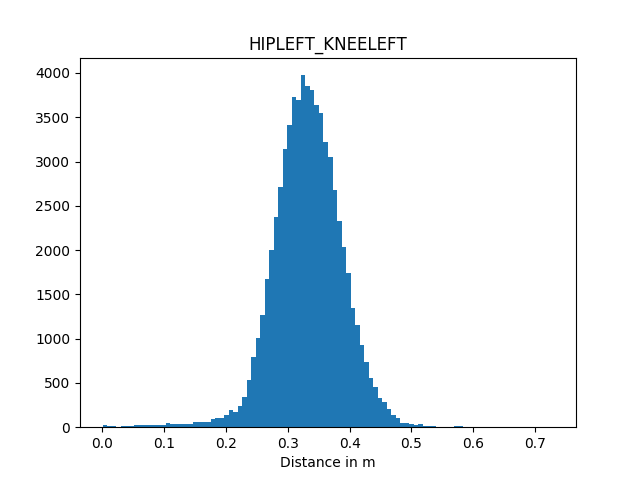

<IPython.core.display.Javascript object>


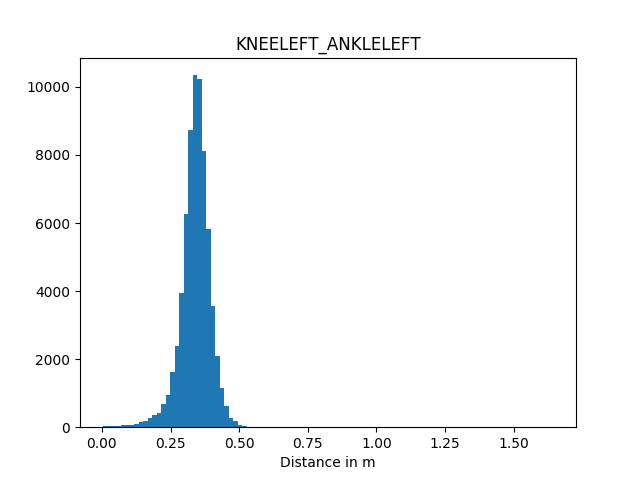

<IPython.core.display.Javascript object>


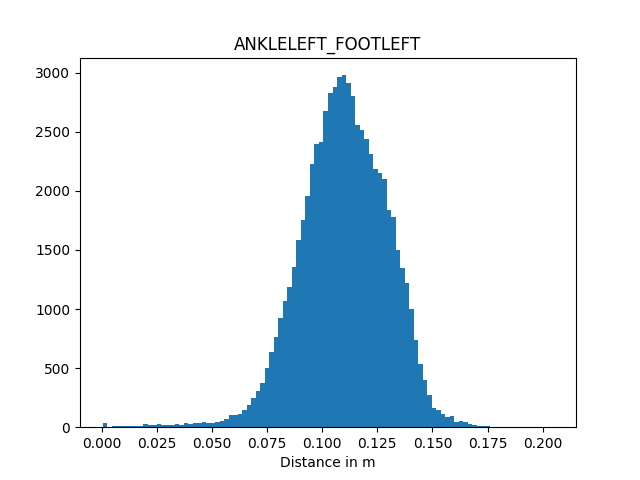

In [7]:
titles = ["SPINEMID_SPINEBASE", 
          "SPINEMID_SPINESHOULDER",
          "SPINESHOULDER_NECK", 
          "NECK_HEAD",
          
         "SPINESHOULDER_SHOULDERLEFT",
         "SHOULDERLEFT_ELBOWLEFT",
         "ELBOWLEFT_WRISTLEFT",
         "WRISTLEFT_HANDLEFT",
         "HANDLEFT_HANDTIPLEFT",
         "HANDLEFT_THUMBLEFT",
          
         "SPINESHOULDER_SHOULDERRIGHT",
         "SHOULDERRIGHT_ELBOWRIGHT",
         "ELBOWRIGHT_WRISTRIGHT",
         "WRISTRIGHT_HANDRIGHT",
         "HANDRIGHT_HANDTIPRIGHT",
         "HANDRIGHT_THUMBRIGHT",
          
         "SPINEBASE_HIPRIGHT",
         "HIPRIGHT_KNEERIGHT",
         "KNEERIGHT_ANKLERIGHT",
         "ANKLERIGHT_FOOTRIGHT",
          
         "SPINEBASE_HIPLEFT",
         "HIPLEFT_KNEELEFT",
         "KNEELEFT_ANKLELEFT",
         "ANKLELEFT_FOOTLEFT",]

for i in range(connexion_tuples.shape[0]):
    plt.figure()
    distributions = np.stack(avg_distances, axis=1)
    plt.hist(distributions[i,:], bins=100)
    plt.gca().set(title=titles[i], xlabel='Distance in m');


In [8]:
# Compute mean 
mean = np.mean(distributions, axis=1)
std = np.std(distributions, axis=1)

for i in range(connexion_tuples.shape[0]):
    print(str(titles[i]))
    print("\t mean : " + str(mean[i]) + " , std : " + str(std[i]))

SPINEMID_SPINEBASE
	 mean : 0.27819084398185734 , std : 0.042306813870363655
SPINEMID_SPINESHOULDER
	 mean : 0.2072314260821465 , std : 0.031403656109533454
SPINESHOULDER_NECK
	 mean : 0.06872700555138177 , std : 0.010089826446924756
NECK_HEAD
	 mean : 0.12410289796639888 , std : 0.018419264420819002
SPINESHOULDER_SHOULDERLEFT
	 mean : 0.15673096460588268 , std : 0.03459586136324273
SHOULDERLEFT_ELBOWLEFT
	 mean : 0.23435873238257438 , std : 0.0359613935357437
ELBOWLEFT_WRISTLEFT
	 mean : 0.22360625038181287 , std : 0.03265030310684343
WRISTLEFT_HANDLEFT
	 mean : 0.06857673104772795 , std : 0.02267243594764133
HANDLEFT_HANDTIPLEFT
	 mean : 0.05745153875166355 , std : 0.015524496668465018
HANDLEFT_THUMBLEFT
	 mean : 0.04307127264151265 , std : 0.010959037793872809
SPINESHOULDER_SHOULDERRIGHT
	 mean : 0.15659959710111895 , std : 0.03625772674547508
SHOULDERRIGHT_ELBOWRIGHT
	 mean : 0.23201459624809423 , std : 0.035185331456944254
ELBOWRIGHT_WRISTRIGHT
	 mean : 0.2228425115642521 , std : 

## Rescaling

Now that we have the average values of each neighbors, let's rescale our skeleton. Basic idea is, start from SPINEBASE and propagate through adjacent joints.


### Build skeleton graph from connexion tuples

In [9]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import depth_first_tree

def compute_skeleton_graph(connexion_tuples):
    # connexion_tuples shape (n_neighboring_connections, )
    n_joints = np.amax(connexion_tuples) + 1
    
    skeleton_graph = np.zeros((n_joints, n_joints))
    
    for neighbor_joints in connexion_tuples:
        skeleton_graph[neighbor_joints[0], neighbor_joints[1]] = 1
        
    return skeleton_graph

In [10]:
skeleton_graph_matrix = compute_skeleton_graph(connexion_tuples)
skeleton_graph = csr_matrix(skeleton_graph_matrix)



In [11]:
def rescale_skeleton(skeleton):
    # skeleton shape (3, max_frame, n_joints = 25, n_subjects = 2)
    def rescale_one_skeleton(avg_distances, subject):
        # avg_distances shape (n_neighboring_connections, )
        # subject shape (3, max_frame, n_joints = 25)
        
        # print(avg_distances)
        
        # shape (n_neighboring_connections, )
        scale_factor = mean / avg_distances
        # scale_factor = 2.0 * np.ones((24, ))
        
        # print(scale_factor)
             
        # Start at line 0
        queue = [0]
        
        while queue:
            # Get neighbors
            current_joint_idx = queue[0]
            neighbors = np.array(np.where(skeleton_graph_matrix[current_joint_idx, :] == 1)).transpose(1, 0) # shape (n_neighbors, 1)

            for joint in neighbors:
                queue.append(int(joint))
            
            '''
            print("queue")
            print(queue)
            print("current joint idx : " + str(current_joint_idx))
            '''
            
            # Compute direction vector
            for i in range(neighbors.shape[0]):
                neighbor_idx = int(neighbors[i])
                # print("current neighbor : " + str(neighbor_idx))

                # compute direction vector shape (3, max_frame)
                direction_vector = subject[:, :, neighbor_idx] - subject[:, :, current_joint_idx]

                # find index where connexion_tuple[index] = [current_joint_idx, neighbor_idx]
                connexion_tuple_idx = [i for i in range(connexion_tuples.shape[0]) if  np.array_equal(connexion_tuples[i, :], np.array([current_joint_idx, neighbor_idx]))][0]

                # scale direction vector shape (3, max_frame)
                scaled_direction_vector = scale_factor[connexion_tuple_idx] * direction_vector

                # compute translation_vector shape (3, max_frame)
                translation_vector = scaled_direction_vector - direction_vector

                # Propagate new position
                ## Find all children of neighboring joint
                children_graph_matrix = depth_first_tree(skeleton_graph, neighbor_idx, directed=True).toarray().astype(int)

                children = np.array([i for i in range(children_graph_matrix.shape[0]) if np.sum(children_graph_matrix[:, i]) > 0])
                # print("children : ")
                # print(children)

                ## Propagate new position
                '''
                print("translation vector")
                print(translation_vector[0, 0])
                print("subject at frame 0")
                print(subject[0, 0, :])
                '''
                subject[:, :, neighbor_idx] += translation_vector
                for child in children: subject[:, :, child] += translation_vector

                '''
                print("translated subject at frame 0")
                print(subject[0, 0, :])
                print()
                print()
                '''
            
            queue.pop(0)
            
        return subject
    
    distances_matrix = adjacent_joints_distance(skeleton)
    distances_matrix = np.mean(distances_matrix, axis=1)
    
    avg_distances_sub_0 = distances_matrix[:, 0]
    avg_distances_sub_1 = distances_matrix[:, 1]
    
    subject0 = skeleton[:, :, :, 0]
    subject1 = skeleton[:, :, :, 1]
    
    # Scale if subject exists
    if np.any(avg_distances_sub_0):
        subject0 = rescale_one_skeleton(avg_distances_sub_0, subject0)
    if np.any(avg_distances_sub_1):
        subject1 = rescale_one_skeleton(avg_distances_sub_1, subject1)
        
    scaled_skeleton = np.stack([subject0, subject1], axis=-1)
    
    print(avg_distances_sub_0)
    print(np.mean(adjacent_joints_distance(scaled_skeleton), axis=1)[:, 0])
    
    return scaled_skeleton


/home/gnocchi/.virtualenvs/ntu-rgb-d/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


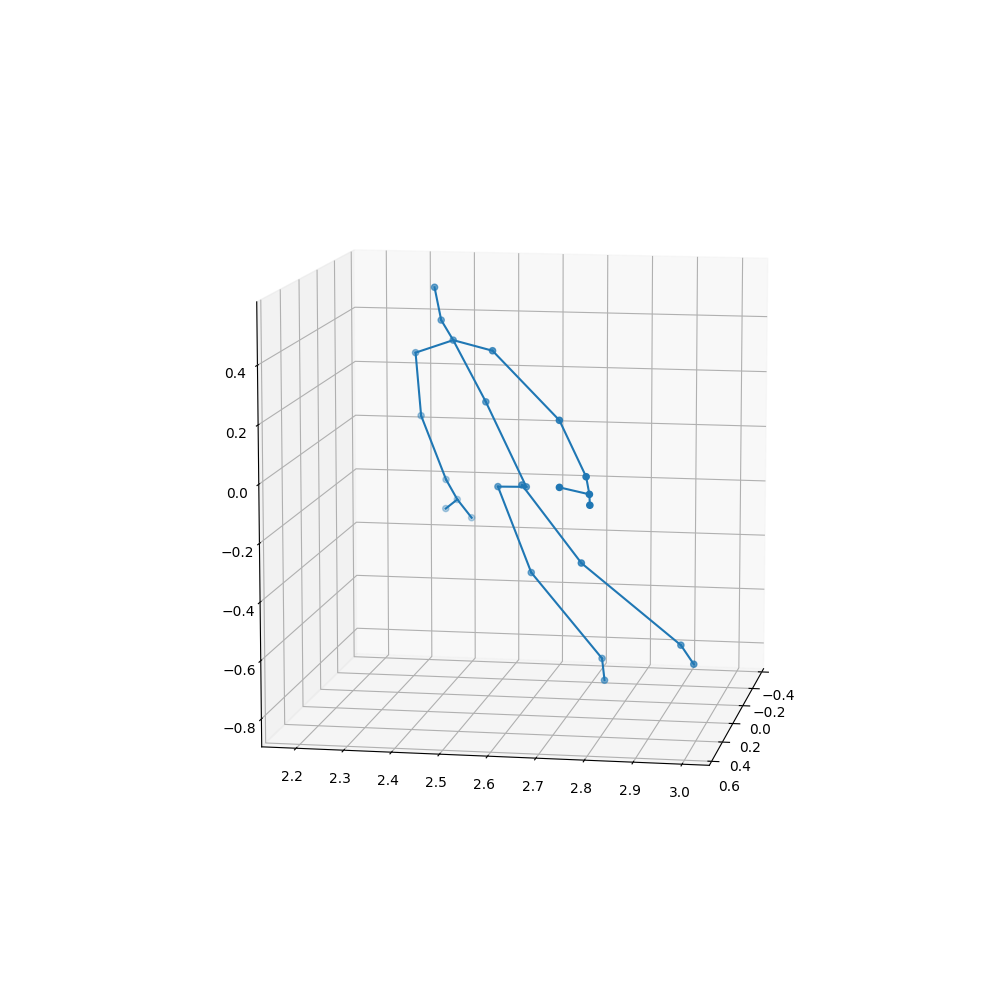

In [12]:
animateJointCoordinates(dataset[sample_name]["skeleton"][:].transpose(3, 2, 0, 1)[0], connexion_tuples)

In [13]:
scaled_skeleton = rescale_skeleton(np.copy(dataset[sample_name]["skeleton"][:]))

[0.29978028 0.2220411  0.07339158 0.1365915  0.1534788  0.23649014
 0.25004318 0.06943933 0.0699353  0.04815281 0.16247082 0.27972091
 0.23559892 0.05647644 0.06397494 0.05603719 0.05898619 0.29179528
 0.38470209 0.11709267 0.09243361 0.32844046 0.35019903 0.09719603]
[0.27819086 0.20723142 0.06872701 0.12410291 0.15673096 0.23435874
 0.22360626 0.06857673 0.05745155 0.04307127 0.1565996  0.2320146
 0.22284251 0.07059397 0.05760946 0.04280207 0.07021397 0.33220708
 0.34030231 0.1102119  0.0699555  0.33225116 0.3404185  0.10983119]


<IPython.core.display.Javascript object>


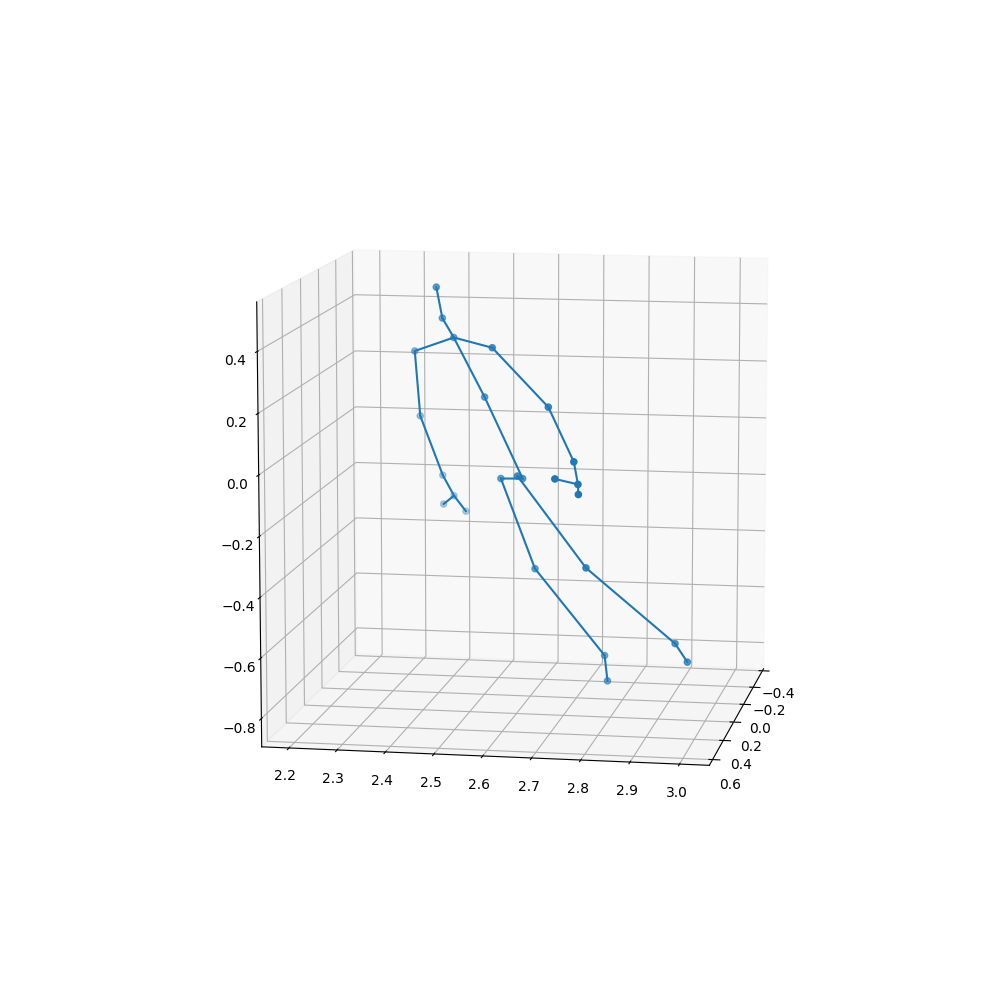

In [14]:
animateJointCoordinates(scaled_skeleton.transpose(3, 2, 0, 1)[0], connexion_tuples)